El siguiente notebook consiste en el desarrollo de las actividades pedidas en el curso de visión artificial de la Universidad Nacional de Colombia Sede Medellín, dictado por el profesor Jhon William Branch. El material des este curso fue recopilado    por los estudiantes Alberto Mario Ceballos Arroyo y Jairo Andres Rodriguez Rodriguez y se enuentra en el reositorio para el curso de Visión Artificial:
https://github.com/alceballosa/Vision-Artificial-2019-01

# Actividades de clase, semanas 4, 5 y 6.

La practica consta de 3 módulos, el objetivo es afianzar los conceptos vistos sobre transformaciones afines de la imagen, transformaciones no lineales e introducir los conceptos de convolución y ruido, encontrarán actividades para los módulos I y II, y una introducción al módulo III, que se extenderá hasta el día martes 25 de junio.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

# Módulo I

## 1.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", en escala de grises.

A continuación, mediante transformaciones geométricas de reflexión y rotación obtenga lo siguiente:

<img src="res/transformacion.png">

NOTA: Usted debe presentar dos resultados, uno de ellos aplicando una reflexión directamente, y el otro aplicando una rotación inicialmente.

In [1]:
## Importo las librerías
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Imagen Rotada')

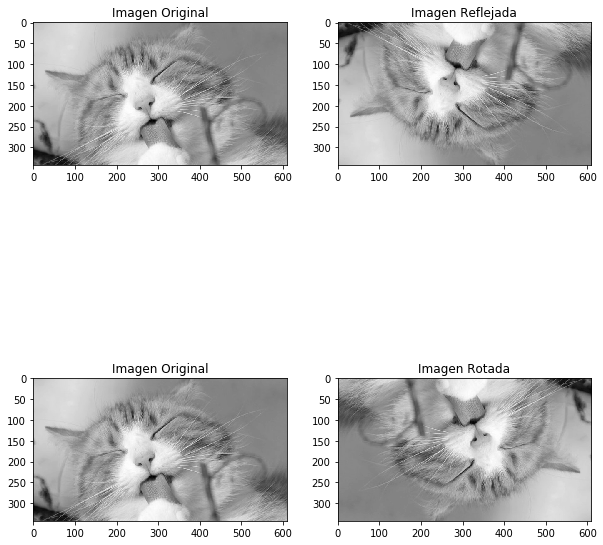

In [2]:
## Lectura de la imagen en escala de girses
gato1 = cv2.imread("res/gato.jpg", cv2.IMREAD_GRAYSCALE)

# REFLEXIÓN

filas,columnas = gato1.shape # Capturo filas y columnas

## Hago la reflexión en Y, ya que debe ser vertical
MY = np.float32([[1,0,0],[0,-1,filas]])
gato2 = cv2.warpAffine(gato1,MY,(columnas,filas))

# ROTACIÓN

theta = 180 # Ángulo de rotación
rotation_center = ((columnas/2,filas/2)) # Centro de rotación

## Obtengo la matríz de rotación
MR = cv2.getRotationMatrix2D(rotation_center,theta,1)

## Aplico la matríz de rotación
gato3 = cv2.warpAffine(gato1,MR,(columnas,filas))

## Creo las dos columnas, una donde se mostrará la imagen original y la otra la imagen con la rotación aplicada
fig = plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.imshow(gato1,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(gato2,cmap='gray')
plt.title("Imagen Reflejada")

plt.subplot(2,2,3)
plt.imshow(gato1,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,4)
plt.imshow(gato3,cmap='gray')
plt.title("Imagen Rotada")

La imagen rotada y la reflejada son exactamente iguales pero se llega mediante procesos diferentes, el proceso mediante reflexión es un poco más sencillo, pero este no seriviría si se fuera a girar la imagen en otro ángulo.

## 2.

Utilice la imagen obtenida en el primer punto, a continuación, mediante la transformación inclinación, con ix = iy = -0.2, obtenga:

<img src = "res/incli.png">

Ayuda: Recuerde que la matriz afin de inclinación, viene dada por:

<img src = "res/mat.png">

Adicionalmente, recuerde que para aplicar la transformación afín sobre la imagen, puede utilizar la función de OpenCv, "cv2.warpAffine"

Text(0.5, 1.0, 'Imagen Inclinada')

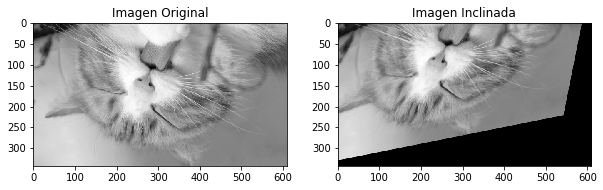

In [3]:
## Tomo los datos de filas y columnas de la imagen
filas,columnas = gato2.shape

## Creo la matriz de la inclinación
ix = -0.2
iy = -0.2
MI = np.float32([[1,ix,0],[iy,1,0]])

## Aplicar la matriz generada a la imagen
gato_inc = cv2.warpAffine(gato2,MI,(columnas,filas))

## Muestro las imágenes
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(gato2,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(gato_inc,cmap='gray')
plt.title("Imagen Inclinada")

Al tomar esos grados de inclinación en ambos ejes, la imagen perdió bastante información como la pata del gato.

## 3.

Utilizando la imagen obtenida, en el punto 2, lea la imagen "mascara2.png" que se encuentra en la carpeta "res", a continuación utilice una operación entre imágenes para obtener la imagen que se muestra a continuación:

<img src = "res/ress.png">

Posteriormente, mediante una operación rotación obtenga:

<img src = "res/rot2.png">

Finalmente, pruebe rotando primero la imagen y posteriormente aplicando la operación. ¿Son los resultados iguales? ¿Qué puede concluir al respecto?

Text(0.5, 1.0, 'Resultante')

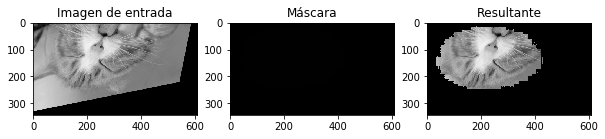

In [4]:
## Lectura de la máscara y cambio de tipo a 'gato_inc'
gato_inc = cv2.cvtColor(gato_inc, cv2.COLOR_BGR2RGB)
mask = cv2.imread("res/mascara2.png")/255

## Ajuste de tamaño y cambio de tipo de dato
mask = cv2.resize(mask, (gato_inc.shape[1], gato_inc.shape[0])).astype(np.uint8)

## Multiplicación
gato_cara = cv2.multiply(gato_inc, mask)

## Muestro las imágenes
fig = plt.figure(figsize=(10,12))

plt.subplot(1,3,1)
plt.imshow(gato_inc,cmap='gray')
plt.title("Imagen de entrada")

plt.subplot(1,3,2)
plt.imshow(mask,cmap='gray')
plt.title("Máscara")

plt.subplot(1,3,3)
plt.imshow(gato_cara,cmap='gray')
plt.title("Resultante")

Text(0.5, 1.0, 'Imagen Salida')

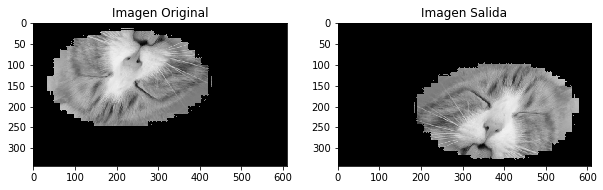

In [5]:
theta = 180 # Ángulo de rotación
rotation_center2 = ((columnas/2,filas/2)) # Centro de rotación

## Obtengo la matríz de rotación
MR2 = cv2.getRotationMatrix2D(rotation_center2,theta,1)

## Aplico la matríz de rotación
cara_rot = cv2.warpAffine(gato_cara,MR2,(columnas,filas))

## Muestro ambas imágenes
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(gato_cara,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(cara_rot,cmap='gray')
plt.title("Imagen Salida")

Text(0.5, 1.0, 'Imagen con tranformación invertida')

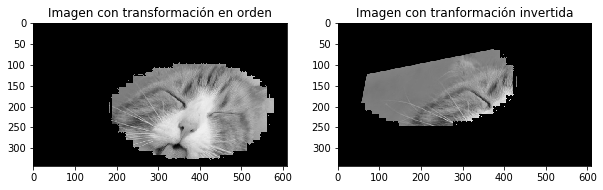

In [6]:
# Ahora haremos el proceso invertido para ver si los resultados son iguales

## Primero rotamos
theta = 180 # Ángulo de rotación
rotation_center3 = ((columnas/2,filas/2)) # Centro de rotación

## Obtengo la matríz de rotación
MR3 = cv2.getRotationMatrix2D(rotation_center3,theta,1)

## Aplico la matríz de rotación
rot1 = cv2.warpAffine(gato_inc,MR2,(columnas,filas))

## Ahora aplicamos la máscara
rot2 = cv2.multiply(rot1, mask)

## Imprimimos
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(cara_rot,cmap='gray')
plt.title("Imagen con transformación en orden")

plt.subplot(1,2,2)
plt.imshow(rot2,cmap='gray')
plt.title("Imagen con tranformación invertida")

El resultado de hacer primero la rotación y luego la máscara es totalmente diferente que si lo hicieramos al revés, ya que la máscara se mantiene en su posición original por lo que no captura la misma parte de la imagen.

# Módulo II

## 1.

Es posible realizar transformaciones no lineales sobre una imagen, tales como la parábola y la raíz cuadrada mostradas en la clase. De forma análoga implemente un algoritmo donde la transformación no lineal corresponda a una función exponencial. 

<br><center>$a*exp(bx+c)$ </center></br>

Donde a,b y c son constantes.

<br> Para realizar este ejercicio, lea la imagen "calabazas.png" que se encuentra en la carpeta "res" </br>

<b> Sugerencia: Utilice los ejemplos de clase como referencia para aplicar una transformación no lineal sobre la imagen, recuerde variar los parámetros a,b y c para obtener resultados distintos y poder concluir. </b>

## 2.

Lea la imagen "eiffel.png" que se encuentra en la carpeta "res", implemente la ecualización exponencial y la ecualización de Rayleigh, posteriormente compare las imágenes modificadas y los histogramas obtenidos.

<br><b>Ecualización exponencial</b></br>

<img src = res/expo.png>

<br><b>Ecualización de Rayleigh</b></br>

<img src = res/ray.png>

Recuerde que $ln(0)$ representa una indeterminación, por lo tanto es sugerible sumar un valor $epsilon$ muy pequeño ($1e-5$ o menor) al argumento del logaritmo natural.

<br><b> Sugerencia: Una imagen saturada implica pérdida de información, por lo tanto deben utilizarse parámetros $alpha$ adecuados en cada caso. </b><br>

## 3.

Lea la imagen "gatonegro.jpg" que se encuentra en la carpeta "res", a continuación aplique una transformación gamma, donde pueda, variando los parámetros a y gamma, concluir acerca del comportamiento de la imagen con esta transformación aplicada.

Recuerde que la transformación gamma viene dada por:

<center><h3>$f(x)= ax^\gamma$</h3></center>

<img src="res/gamma.png">

¿Qué sucede si 0 < gamma < 1? ¿Qué sucede si gamma > 1? Debe mostrar los resultados obtenidos.

Text(0.5, 1.0, 'Gamma muy alto')

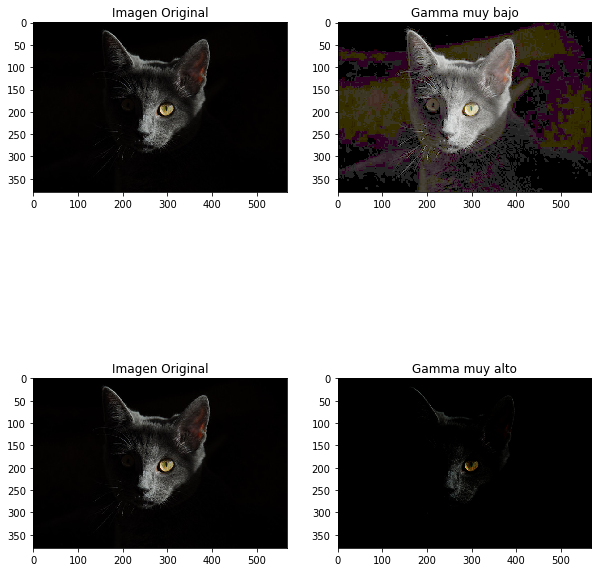

In [13]:
## Importar las liberias

%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt
# FUNCIONES

## Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

## Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

## Lectura de la imagen
gnegro = cv2.cvtColor(cv2.imread('res/gatonegro.jpg'), cv2.COLOR_BGR2RGB)

## Asigno los valores constantes (claro)
a = 1
gamma = 0.35

#Aplicar la transformación corrección gamma sobre la imagen de entrada
negro1 = apply_f_on_rgb(gnegro, gamma_correction, [a, gamma])

## Asigno unos valores diferente (oscuro)
a = 1
gamma = 3

negro2 = apply_f_on_rgb(gnegro, gamma_correction, [a, gamma])

## Imprimo las imágenes
fig = plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
plt.imshow(gnegro,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(negro1,cmap='gray')
plt.title("Gamma muy bajo")

plt.subplot(2,2,3)
plt.imshow(gnegro,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,4)
plt.imshow(negro2,cmap='gray')
plt.title("Gamma muy alto")

# Módulo III

# 1.

Cree una imagen artificial utilizando la siguiente matriz:

$$I = \begin{bmatrix}
255 & 255 & 0 \\
255 & 0 & 255 \\
0 & 255 & 255 \end{bmatrix}
$$

Adicionalmente, cree la siguiente máscara:
    
$$Máscara = \begin{bmatrix}
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \end{bmatrix}
$$

Mediante la operación de convolución, muestre, el resultado de la convolución sobre la posición (1,1) de la matriz.

Ayuda: Debería obtener un resultado como el siguiente:

<img src= "res/ayuda.png">

En la posición (1,1) el resultado de la convolución es: 253


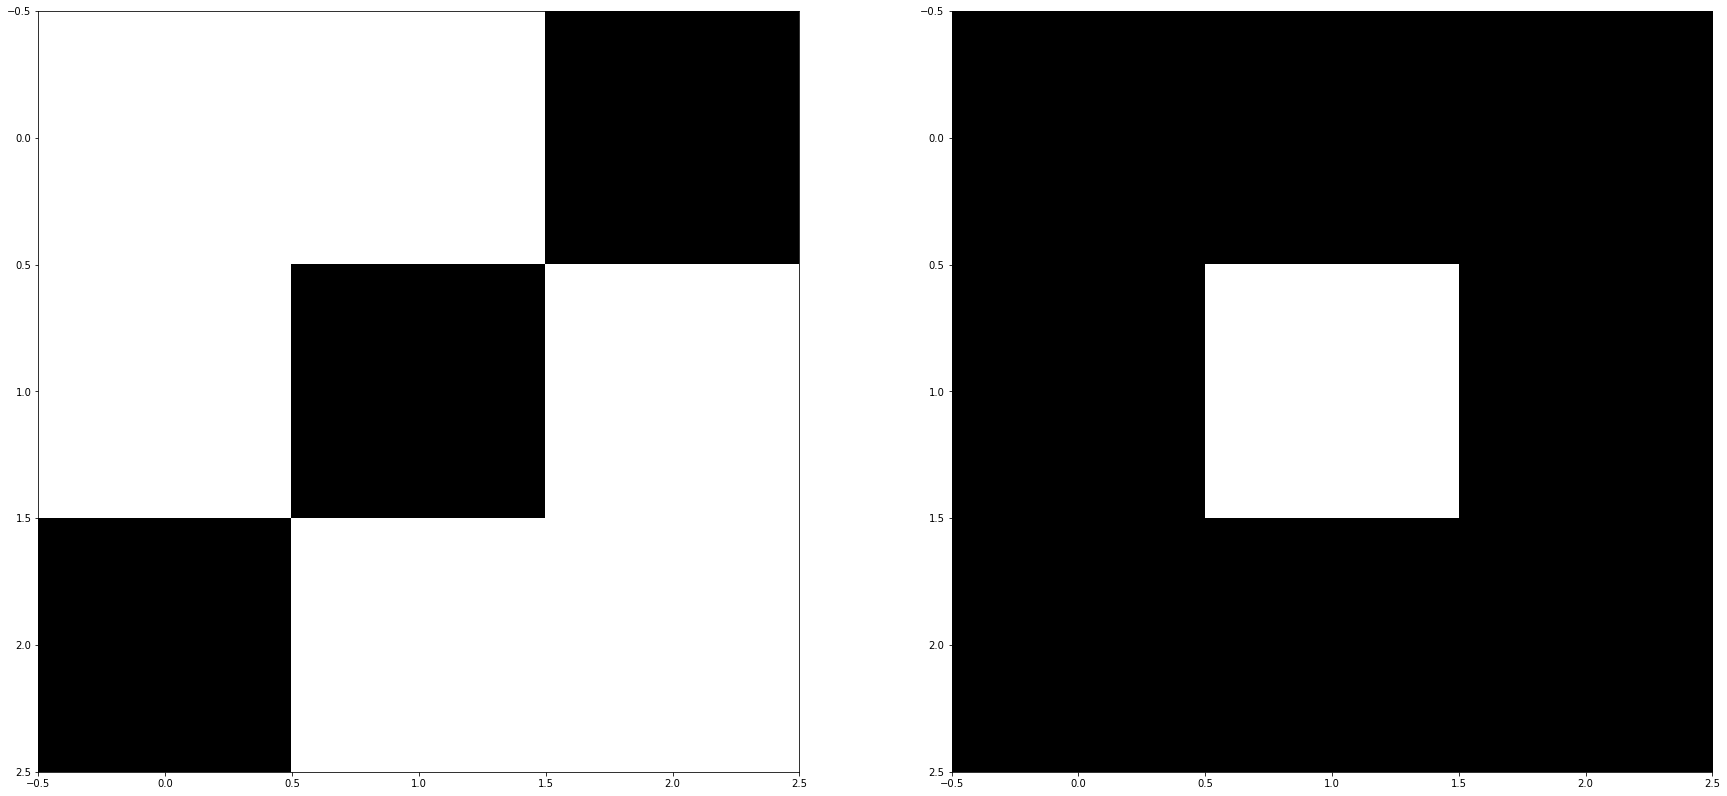

In [13]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

imagen = np.array([[255,255,0],
              [255,0,255],
              [0,255,255]], dtype=np.uint8)

mascara = np.array([[1/2,1/2,1/2],
              [1/2,1/2,1/2],
              [1/2,1/2,1/2]], dtype=np.float64)

# Posicion para la convolución
x = 1
y = 1

kernel = 1

res = np.array([[0,0,0],
              [0,0,0],
              [0,0,0]], dtype=np.float64)

for i in range(-kernel, kernel+1):
    for j in range(-kernel, kernel+1):
        res[1][1] += imgagen[x+i][y+j] * mascara[kernel+i][kernel+j]
        

res=res.astype(np.uint8)

fig, con = plt.subplots(nrows=1, ncols=2, figsize=(30,15))
con[0].imshow(imagen, cmap="gray")
con[1].imshow(res, cmap="gray")


print("En la posición (1,1) el resultado de la convolución es:", res[1][1])

Conclusión: se ve una diferencia entre los filtros convencionales y los procesos de convolución, pues se tiene en cuenta la posición especifica del pixel y no un promedio de las características generales en esta. Creando así cambios como los que se ven en la imagen, en donde hay un cambio drástico a partir de la operación con los pixeles vecinos de cada uno.